In [41]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import warnings


In [43]:
def classificador_fuzzy(w1,w2,w3,w4):
  
  
  universe = np.linspace(0, 1, 100)
  
  iris = datasets.load_iris()
  y=iris.target
  x=iris.data

  scaler = MinMaxScaler()
  x = scaler.fit_transform(x)
  y = y.tolist()
  
  #Definindo função de pertinencia
  x1_short =  fuzz.trimf(universe, [0, 0, w1])
  x1_medium = fuzz.trimf(universe, [0, w1, 1])
  x1_long =   fuzz.trimf(universe, [w1, 1, 1])

  x2_short =  fuzz.trimf(universe, [0, 0, w2])
  x2_medium = fuzz.trimf(universe, [0, w2, 1])
  x2_long =   fuzz.trimf(universe, [w2, 1, 1])

  x3_short =  fuzz.trimf(universe, [0, 0, w3])
  x3_medium = fuzz.trimf(universe, [0, w3, 1])
  x3_long =   fuzz.trimf(universe, [w3, 1, 1])

  x4_short =  fuzz.trimf(universe, [0, 0, w4])
  x4_medium = fuzz.trimf(universe, [0, w4, 1])
  x4_long =   fuzz.trimf(universe, [w4, 1, 1])


 #Fuzzificando as entradas
  x1_level_short =  fuzz.interp_membership(universe, x1_short, x[:,[0]])
  x1_level_medium = fuzz.interp_membership(universe, x1_medium, x[:,[0]])
  x1_level_long =   fuzz.interp_membership(universe, x1_long, x[:,[0]])

  x2_level_short =  fuzz.interp_membership(universe, x2_short, x[:,[1]])
  x2_level_medium = fuzz.interp_membership(universe, x2_medium, x[:,[1]])
  x2_level_long =   fuzz.interp_membership(universe, x2_long, x[:,[1]])

  x3_level_short =  fuzz.interp_membership(universe, x3_short, x[:,[2]])
  x3_level_medium = fuzz.interp_membership(universe, x3_medium, x[:,[2]])
  x3_level_long =   fuzz.interp_membership(universe, x3_long, x[:,[2]])

  x4_level_short =  fuzz.interp_membership(universe, x4_short, x[:,[3]])
  x4_level_medium = fuzz.interp_membership(universe, x4_medium, x[:,[3]])
  x4_level_long =   fuzz.interp_membership(universe, x4_long, x[:,[3]])

  #Inferência
  is_setosa = np.fmin(np.fmax(x3_level_short, x3_level_medium), x4_level_short) 
  is_versicolor = np.fmax(np.fmin(np.fmin(np.fmin(np.fmax(x1_level_short, x1_level_long), np.fmax(x2_level_medium, x2_level_long)), np.fmax(x3_level_medium, x3_level_long)),x4_level_medium), np.fmin(x1_level_medium, np.fmin(np.fmin(np.fmax(x2_level_short, x2_level_medium),x3_level_short), x2_level_long)))
  is_virginica = np.fmin(np.fmin(np.fmax(x2_level_short, x2_level_medium), x3_level_long), x4_level_long)
 
  result = np.argmax([is_setosa, is_versicolor, is_virginica], axis=0)
 
  obj_func = 1 - accuracy_score(y, result)
  
  return obj_func

In [45]:
from sko.PSO import PSO

In [47]:
warnings.filterwarnings("ignore")

In [49]:
pso = PSO(func=classificador_fuzzy, n_dim=4, pop=40, max_iter=80, lb=[0, 0, 0, 0], ub=[1, 1, 1, 1], w=0.8, c1=1.5, c2=0.5)
pbest_x, gbest_y = pso.run()
print('best_x:', pbest_x, '\n', 'best_y:', gbest_y)


best_x: [0.         0.         0.         0.40960625] 
 best_y: [0.04]


In [51]:
accuracy_PSO = 1 - gbest_y
print('Acurácia PSO:', 1 - gbest_y)

Acurácia PSO: [0.96]


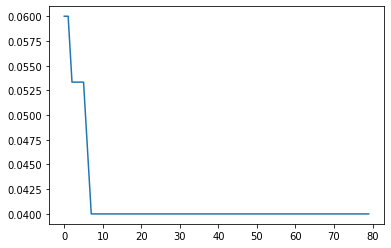

In [53]:
plt.plot(pso.gbest_y_hist)
plt.show()

In [54]:
from sko.GA import GA

In [55]:
ga = GA(func=classificador_fuzzy, n_dim=4, size_pop=40, max_iter=80, prob_mut=0.01, lb=[0,0,0,0], ub=[1,1,1,1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [0.96001678 0.62215254 0.20543755 0.4160678 ] 
 best_y: [0.04666667]


In [56]:
accuracy_GA = 1 - best_y
print('Acurácia GA:', 1 - best_y)

Acurácia GA: [0.95333333]


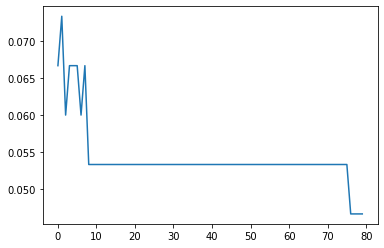

In [57]:
plt.plot(ga.generation_best_Y)
plt.show()